In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load data
data = pd.read_csv("C:\\Users\\pc\\Downloads\\code soft data\\Churn_Modelling.csv")
print(data.head())
print(data.info())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [3]:
# Check for missing values
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [4]:
# Dropping irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [5]:
# Converting categorical features to numerical values
data = pd.get_dummies(data, drop_first=True)
print(data.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        Fals

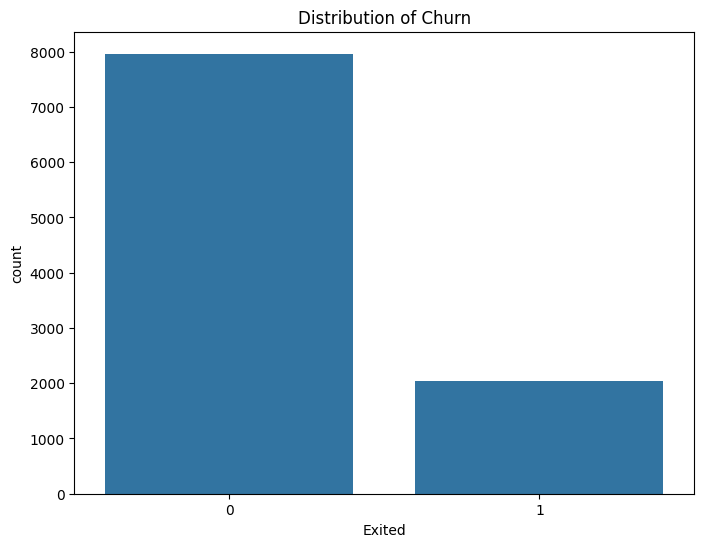

In [6]:
# Data visualization
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=data)
plt.title('Distribution of Churn')
plt.show()

In [7]:
# Splitting data into features and target
X = data.drop('Exited', axis=1)
y = data['Exited']

In [8]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)

Training Shape:  (9000, 11)
Testing Shape:  (1000, 11)


In [9]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)
accuracy1 = LR.score(X_test_scaled, y_test)
print("Logistic Regression Accuracy:", accuracy1)

Logistic Regression Accuracy: 0.809


In [11]:
# Support Vector Machine
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train_scaled, y_train)
accuracy2 = svm_model.score(X_test_scaled, y_test)
print("SVM Accuracy:", accuracy2)

SVM Accuracy: 0.865


In [12]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
accuracy3 = rf.score(X_test_scaled, y_test)
print("Random Forest Accuracy:", accuracy3)

Random Forest Accuracy: 0.868


In [13]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
accuracy4 = dt.score(X_test_scaled, y_test)
print("Decision Tree Accuracy:", accuracy4)

Decision Tree Accuracy: 0.798


In [14]:
# KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
accuracy5 = KNN.score(X_test_scaled, y_test)
print("KNeighbors Classifier Accuracy:", accuracy5)

KNeighbors Classifier Accuracy: 0.84


In [15]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=42)
GBC.fit(X_train_scaled, y_train)
accuracy6 = GBC.score(X_test_scaled, y_test)
print("Gradient Boosting Classifier Accuracy:", accuracy6)

Gradient Boosting Classifier Accuracy: 0.867


In [16]:
# Adding XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
accuracy7 = xgb.score(X_test_scaled, y_test)
print("XGBoost Classifier Accuracy:", accuracy7)


XGBoost Classifier Accuracy: 0.868


In [17]:
# Performance summary
performance_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'Decision Tree', 'KNN', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6, accuracy7]
})

In [18]:

print(performance_summary)

                 Model  Accuracy
0  Logistic Regression     0.809
1                  SVM     0.865
2        Random Forest     0.868
3        Decision Tree     0.798
4                  KNN     0.840
5    Gradient Boosting     0.867
6              XGBoost     0.868
